# Соревнование на Kaggle: teta_ml_2_2025  
## Предсказание числа дней занятости аренды недвижимости  

#### Overview  
Соревнование в рамках курса от МТС. Задача: предсказание дней занятости (или простоя) аренды недвижимости.  

#### Description  
Соревнование по задаче регрессии  

#### Evaluation  
Оценка по метрике MSE  

### Dataset Description  

#### Files  
train.csv - the training set  
test.csv - the test set  
sample_submission.csv - a sample submission file in the correct format  

#### Columns  

| Column            | Description |
|------------------|-------------|
| name            | название объекта |
| _id             | уникальный идентификатор |
| host_name       | имя владельца или хоста, который предоставляет жилье |
| location_cluster | кластеризация местоположений (например, группировка объектов по районам или зонам). |
| location        | описание местоположения объекта |
| lat, lon       | широта и долгота местоположения объекта. |
| type_house      | тип жилья |
| sum            | общая стоимость аренды или сумма за определенный период. |
| min_days       | минимальное количество дней для бронирования объекта. |
| amt_reviews    | количество отзывов, оставленных для данного объекта. |
| last_dt        | дата последнего отзыва или последнего бронирования. |
| avg_reviews    | средний рейтинг или среднее количество отзывов за определенный период. |
| total_host     | общее количество объектов, принадлежащих одному хосту |
| target         | целевая переменная |



## Intro
### Описание финального решения:
1) **как обработали данные**;
   
   - Заполнил пропуски - медианным значением для непрерывных переменных и значениями между значениями слева и справа для дат;
   - Категориальные признаки закодировал с помощью CatBoost Encoder (Target Encoding);
   - Скалирование непрерывных переменных не показало достаточного прироста в качестве скора - скорее, модель наоборот выдавала более смещенные предикты, чем ожидалось.
   - Сгенерировал достаточно много собственных признаков (смотреть ноутбук далее);
   - Отдельное внимание уделил нелинейному преобразованию признаков, в том числе и собственных признаков - квадраты и логарифмы показали значимость практически при всех методах оценки значимости переменных в модели.

3) **какой алгоритм вы выбрали**;
   
   - Использовал CatBoost для задачи регрессии с собственным подбором гиперпараметров как BaseLine модель;
   - Использовал CatBoost для задачи регрессии с побором параметров с помощью Hyperopt и 10-Fold KFold Cross-Validation - Final модель.

5) **какие особенности использовали при его обучении**;
   
   - Пробовал передавать категориальные признаки как в сам алгоритм, так и кодировать отдельно - кодировка с помощью CatBoost Encoding отдельно показала более хорошие результаты;
   - Достаточно много потратил времени на ручной подбор глубины деревьев - на удивление, как мне показалось, подобранные гиперпараметры не всегда давали лучший скор на Kaggle;

7) **как проводили валидацию алгоритма**.
   
   - 10-Fold KFold Cross-Validation в Final модели;
   - Использовал Hyperopt для подбора оптимальных гиперпараметров.

## Outro
### Описание вариантов по дальнейшему улучшению итогового подхода:

1) **идея №1, которая может улучшить метрику, как ее реализовать (что для этого нужно сделать)**;
   
   - **Feature Engeneering**
   - Больше времени уделить на feature engeneering - как показала практика, именно FE дает крайне значимый прирост в значениях метрики;
   - Можно достаточно плотно поработать с координатными признаками;
   - Можно много времени уделить на агрерированные показатели по категориям;

2) **идея №2, которая может улучшить метрику, как ее реализовать (что для этого нужно сделать)**;
   
   - **Ансамблирование**
   - В ходе работы пробовал обучить 3 бустинговых базовых алгоритма (XGBoost, LightGBM и CatBoost), а далее использовать мета-модель (линейная регрессия) для получения весов для каждого столбца-вектора предиктов - подход интересный, но выдавал результаты хуже, чем правильно затюненный CatBoost;
   - В целом, считаю, что можно попробовать сделать следующее - обучить не 3 алгоритма, а более 5, причем взять не просто больше вариаций бустинга, а добавить еще алгоритмы с достаточно нестабильными (неробастными) предиктами. Далее, заблендить данные алгоритмы и посмотреть уже на результат такого объединения;
   - В любом случае, кажется, что даже мой первоначальный подход имел место быть, но требовал доработок (более качественный подбор гиперпараметров для базовых алгоритмов, кросс-валидация и прочее).

     
3) **идея №3, которая может улучшить метрику, как ее реализовать (что для этого нужно сделать)**.
   
   - **Обеспечить робастность скора по RMSE**
   - Adversarial Validation / Kolmogorov-Smirnov Test - оценка различий в распределениях, так как продакшн-ready модель должна иметь четкий мониторинг по этой части;
   - Подумать над Out-of-Time Sample

# Практическое задание (смотреть в конце ноутбука)
## ML - Домашнее задание 3  
### Реализация ансамблевых методов с оценкой неопределенности  

**Дедлайн:** 23:59, 4 апреля  

## Вам необходимо:  
Реализовать стекинг для задачи регрессии из соревнования №2, а также оценить неопределенность предсказаний с помощью ансамблей моделей.  

### Базовые модели:  
- Обучите 5 различных моделей, например Random Forest, XGBoost, LightGBM, CatBoost и линейную регрессию (можно использовать другие).  
- Используйте Stratified K-Fold (K=5) для кросс-валидации при обучении каждой модели.  

### Реализация стекинга:  
1. Используйте Stratified K-Fold для получения out-of-fold предсказаний базовых моделей.  
2. Обучите мета-модель на этих предсказаниях.  
3. Получите финальные предсказания на тестовой выборке.  

### Оценка неопределенности:  
- Рассчитайте меру неопределенности предсказаний:  
  - Алеаторную  
  - Эпистемическую  
  - Их сумму  

### Анализ и визуализация:  
- Оцените производительность отдельных моделей и итогового стекинга по метрикам MSE.  
- Визуализируйте зависимость между неопределенностью предсказаний и фактической ошибкой.  

## Формат сдачи:  
- Jupyter Notebook с подробными комментариями и объяснениями.  
- Визуализации результатов (графики, таблицы).  
- Выводы по каждому этапу анализа.  

## Критерии оценки:  
- Корректность реализации стекинга.  
- Качество оценки неопределенности и ее интерпретация.  
- Глубина анализа результатов и качество визуализаций.  
- Чистота и читаемость кода.  

### Оценивание:  
- **8 баллов** – стекинг и оценка неопределенности без критических ошибок.  
- **Зачет на 4:** 7-8 баллов.  
- **Зачет на 5:** 9-10 баллов.  

**ВАЖНО!** Ссылки должны быть рабочие и с открытым доступом для скачивания.  

_Желаем удачи!_


In [4]:
# %pip install -U -q catboost

In [5]:
# !pip install numpy==1.25.0

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from ngboost import NGBRegressor
from catboost import CatBoostRegressor

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import zscore

import category_encoders as ce  

from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [8]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [9]:
test

,name,_id,host_name,location_cluster,location,lat,lon,type_house,sum,min_days,amt_reviews,last_dt,avg_reviews,total_host
0,Amazing 4 Bedrooms 4 Bathrooms sleeps 9,199147185,Lou,Brooklyn,Sunset Park,40.66468,-73.99785,Entire home/apt,399,1,0,NaN,NaN,5
1,Super Spacious room in Brooklyn,259427246,Nelly,Brooklyn,Bedford-Stuyvesant,40.67880,-73.92722,Private room,43,1,4,2019-06-10,2.00,3
2,Stunning 1-Bedroom NYC Apartment on the River!,30283594,Kara,Manhattan,Hell's Kitchen,40.76170,-73.99762,Entire home/apt,275,30,2,2017-09-17,0.08,121
3,Large Bushwick Bedroom in Newly Renovated Aprt...,51985960,Jonathan,Brooklyn,Williamsburg,40.70748,-73.92835,Private room,40,3,0,NaN,NaN,2
4,Bedroom in Crown Heights,68039772,Celeste,Brooklyn,Crown Heights,40.67249,-73.95564,Private room,55,4,1,2018-12-02,0.14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12219,Comfortable stay,15344412,Abe,Staten Island,New Springville,40.58091,-74.15485,Private room,52,1,74,2019-06-25,3.34,3
12220,"Spacious 1 bedroom in Flatbush, Brooklyn, NY.",107090465,Linwood,Brooklyn,East Flatbush,40.63835,-73.94621,Entire home/apt,125,3,2,2019-05-10,0.61,1
12221,Gramercy~Reno New 1BR-Sleeps 4~,2119276,Host,Manhattan,Gramercy,40.73568,-73.98062,Entire home/apt,150,30,2,2015-08-07,0.03,39
12222,Bright room in 2BR apt in Nolita!,24170584,Lauren,Manhattan,Little Italy,40.71959,-73.99604,Private room,99,2,2,2015-10-06,0.04,2


## Feature Engeenering

#### Работа с пропусками

In [12]:
# Заменим
# Удаляем строки с пропусками в last_dt
train = train.dropna(subset=['last_dt'])
# test = test.dropna(subset=['last_dt'])

# Заменяем пропуски в avg_reviews на медиану
train['avg_reviews'].fillna(train['avg_reviews'].median(), inplace=True)
test['avg_reviews'].fillna(test['avg_reviews'].median(), inplace=True)

# Удаляем строки с пропусками в name и host_name
train = train.dropna(subset=['name', 'host_name'])
# test = test.dropna(subset=['name', 'host_name'])

In [13]:
n_clusters = train["location_cluster"].nunique()
print(f"Число уникальных кластеров в location_cluster: {n_clusters}")

Число уникальных кластеров в location_cluster: 5


### Попробуем что-то в упрощенной форме придумать, используя DBSCAN

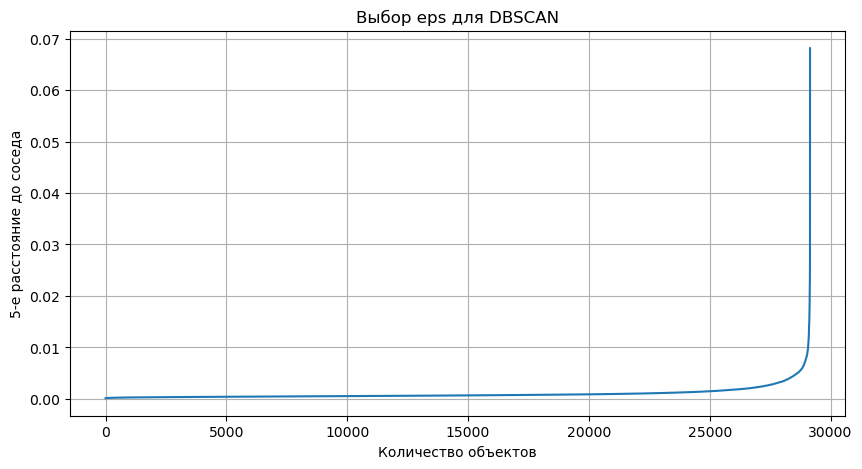

In [15]:
# Подбор eps по методу локтя
min_samples = 5
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(train[['lat', 'lon']])
distances, indices = neighbors_fit.kneighbors(train[['lat', 'lon']])
distances = np.sort(distances[:, -1])

plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.xlabel("Количество объектов")
plt.ylabel(f"{min_samples}-е расстояние до соседа")
plt.title("Выбор eps для DBSCAN")
plt.grid()
plt.show()

In [16]:
# # kmeans - NO!

# from sklearn.cluster import KMeans

# n_clusters = 1000 # feature space quantization??????

eps = 0.03 # так работает )
# Применяем DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=5)
train['location_cluster_dbscan'] = dbscan.fit_predict(train[['lat', 'lon']])
test['location_cluster_dbscan'] = dbscan.fit_predict(test[['lat', 'lon']])  # Предсказания для теста



# Добавляем координаты центроидов для DBSCAN типа среднего по кластерам
train['cluster_lat_centroid'] = train.groupby('location_cluster_dbscan')['lat'].transform('mean')
train['cluster_lon_centroid'] = train.groupby('location_cluster_dbscan')['lon'].transform('mean')

test['cluster_lat_centroid'] = test.groupby('location_cluster_dbscan')['lat'].transform('mean')
test['cluster_lon_centroid'] = test.groupby('location_cluster_dbscan')['lon'].transform('mean')

# Добавляем расстояние до центра кластера
train['dist_to_cluster_center'] = ((train['lat'] - train['cluster_lat_centroid'])**2 + 
                                   (train['lon'] - train['cluster_lon_centroid'])**2) ** 0.5
test['dist_to_cluster_center'] = ((test['lat'] - test['cluster_lat_centroid'])**2 + 
                                  (test['lon'] - test['cluster_lon_centroid'])**2) ** 0.5

# Проверим количество кластеров
num_clusters = len(set(train['location_cluster_dbscan'])) - (1 if -1 in train['location_cluster_dbscan'] else 0)
print(f"DBSCAN нашел {num_clusters} кластеров")

DBSCAN нашел 5 кластеров


### Тоже из части работы с координатами

In [18]:
from geopy.distance import geodesic

# Создадим центральную точку (0, 0)
central_point = (0, 0)

# Рассчитываем расстояние от каждой точки до центральной точки (0, 0)
train['distance_to_central_point'] = train.apply(lambda row: geodesic((row['lat'], row['lon']), central_point).km, axis=1)
test['distance_to_central_point'] = test.apply(lambda row: geodesic((row['lat'], row['lon']), central_point).km, axis=1)

#### Широта и долгота - помучаем их (на удивление, профит действительно был)

In [20]:
# Добавим новые признаки
train['lat_lon_product'] = train['lat'] * train['lon']
train['lat_lon_ratio'] = train['lat'] / train['lon']
train['lat_lon_difference'] = train['lat'] - train['lon']
train['lat_lon_sum'] = train['lat'] + train['lon']
train['lat_squared'] = train['lat'] ** 2
train['lon_squared'] = train['lon'] ** 2
train['lat_lon_squared_product'] = (train['lat'] * train['lon']) ** 2
train['lat_lon_squared_sum'] = train['lat']**2 + train['lon']**2

test['lat_lon_product'] = test['lat'] * test['lon']
test['lat_lon_ratio'] = test['lat'] / test['lon']
test['lat_lon_difference'] = test['lat'] - test['lon']
test['lat_lon_sum'] = test['lat'] + test['lon']
test['lat_squared'] = test['lat'] ** 2
test['lon_squared'] = test['lon'] ** 2
test['lat_lon_squared_product'] = (test['lat'] * test['lon']) ** 2
test['lat_lon_squared_sum'] = test['lat']**2 + test['lon']**2

### Даты

In [22]:
train['last_dt'] = pd.to_datetime(train['last_dt'])
test['last_dt'] = pd.to_datetime(test['last_dt'])

train['last_dt_date'] = train['last_dt'].dt.date
test['last_dt_date'] = test['last_dt'].dt.date

In [23]:
import holidays

# Создаём список праздников для США в 2019 году
us_holidays = holidays.US(years=[2011, 2019])

# Функция для получения названия праздника
def get_holiday_name(date):
    return us_holidays.get(date) if date in us_holidays else "No Holiday"

# Функция для биннинга времени суток
def assign_time_of_day(hour):
    if 6 <= hour < 12:
        return "morning" 
    elif 12 <= hour < 18:
        return "afternoon"
    elif 18 <= hour < 24:
        return "evening" 
    else:
        return "night"

# столбцы для извлечения информации по дате
train['last_dt_month'] = train['last_dt'].dt.month
train['last_dt_week'] = train['last_dt'].dt.isocalendar().week
train['last_dt_day_of_the_week'] = train['last_dt'].dt.dayofweek
train['last_dt_hour'] = train['last_dt'].dt.hour
train['last_dt_minute'] = train['last_dt'].dt.minute

# праздники для 'last_dt'
train["last_dt_holidays"] = train["last_dt"].apply(get_holiday_name)

# Бининг времени суток для 'last_dt'
train['last_dt_binning_by_part'] = train['last_dt_hour'].apply(assign_time_of_day)

# test
test['last_dt_month'] = test['last_dt'].dt.month
test['last_dt_week'] = test['last_dt'].dt.isocalendar().week
test['last_dt_day_of_the_week'] = test['last_dt'].dt.dayofweek
test['last_dt_hour'] = test['last_dt'].dt.hour
test['last_dt_minute'] = test['last_dt'].dt.minute

test["last_dt_holidays"] = test["last_dt"].apply(get_holiday_name)
test['last_dt_binning_by_part'] = test['last_dt_hour'].apply(assign_time_of_day)

#### Сезоны и кварталы

In [25]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

def get_quarter(month):
    if month in [1, 2, 3]:
        return 1
    elif month in [4, 5, 6]:
        return 2
    elif month in [7, 8, 9]:
        return 3
    else:
        return 4

# Применим функции к столбцам
train['season'] = train['last_dt_month'].apply(get_season)
train['quarter'] = train['last_dt_month'].apply(get_quarter)

test['season'] = test['last_dt_month'].apply(get_season)
test['quarter'] = test['last_dt_month'].apply(get_quarter)

### РАССТОЯНИЯ

In [27]:
from math import atan2, cos, radians, sin, sqrt


def haversine_distance(lat1: float, lon1: float, lat2: float, lon2: float, n_digits: int = 0) -> float:
    """
        Функция для расчёта расстояния от точки А до Б по прямой

        :param lat1: Широта точки А
        :param lon1: Долгота точки А
        :param lat2: Широта точки Б
        :param lon2: Долгота точки Б
        :param n_digits: Округляем полученный ответ до n знака после запятой
        :return: Дистанция по прямой с точностью до n_digits
    """

    lat1, lon1, lat2, lon2 = round(lat1, 6), round(lon1, 6), round(lat2, 6), round(lon2, 6)
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)

    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(dlambda / 2) ** 2

    return round(2 * 6372800 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)), n_digits)  # метры.сантиметры


def bearing_degree(lat1: float, lon1: float, lat2: float, lon2: float, n_digits: int = 0) -> float:
    """
        Функция для расчёта угла между прямой [((lat1, lon1), (lat2, lon2)), (нулевой мередиан)]

        :param lat1: Широта точки А
        :param lon1: Долгота точки А
        :param lat2: Широта точки Б
        :param lon2: Долгота точки Б
        :param n_digits: Округляем полученный ответ до n знака после запятой
        :return: Значение угла с точностью до n_digits
    """

    lat1, lon1 = np.radians(round(lat1, 6)), np.radians(round(lon1, 6))
    lat2, lon2 = np.radians(round(lat2, 6)), np.radians(round(lon2, 6))

    dlon = (lon2 - lon1)
    numerator = np.sin(dlon) * np.cos(lat2)
    denominator = np.cos(lat1) * np.sin(lat2) - (np.sin(lat1) * np.cos(lat2) * np.cos(dlon))

    theta = np.arctan2(numerator, denominator)
    theta_deg = (np.degrees(theta) + 360) % 360

    return round(theta_deg, n_digits)

In [28]:
# Рассчитываем для lat и lon

# Угол (bearing) для lat и lon относительно точки (0, 0)
train['bearing_degree_lat_lon_1'] = bearing_degree(train['lat'], train['lon'], 0, 0).values
test['bearing_degree_lat_lon_1'] = bearing_degree(test['lat'], test['lon'], 0, 0).values

train['bearing_degree_lat_lon_2'] = bearing_degree(0, 0, train['lat'], train['lon']).values
test['bearing_degree_lat_lon_2'] = bearing_degree(0, 0, test['lat'], test['lon']).values

# Расстояние (haversine) для lat и lon относительно точки (0, 0)
train['hav_dist_lat_lon_1'] = haversine_distance(train['lat'], train['lon'], 0, 0).values
test['hav_dist_lat_lon_1'] = haversine_distance(test['lat'], test['lon'], 0, 0).values

train['hav_dist_lat_lon_2'] = haversine_distance(0, 0, train['lat'], train['lon']).values
test['hav_dist_lat_lon_2'] = haversine_distance(0, 0, test['lat'], test['lon']).values

## НЕПРЕРЫВНЫЕ ПЕРЕМЕННЫЕ

In [30]:
# Логарифмические преобразования
for feature in ['sum', 'avg_reviews', 'total_host', 'amt_reviews', 'min_days']:
    train[f'{feature}_log'] = np.log1p(train[feature])
    test[f'{feature}_log'] = np.log1p(test[feature])


# Квадраты переменных
for feature in ['sum', 'avg_reviews', 'total_host', 'amt_reviews', 'min_days']:
    train[f'{feature}_squared'] = train[feature] ** 2
    test[f'{feature}_squared'] = test[feature] ** 2
    
    train[f'{feature}_sqrt'] = np.sqrt(train[feature].clip(lower=0))
    test[f'{feature}_sqrt'] = np.sqrt(test[feature].clip(lower=0))


# Тригонометрия - опять же, скорее, тут есть сезонность

for feature in ['sum', 'avg_reviews', 'total_host', 'amt_reviews', 'min_days']:
    train[f'{feature}_sin'] = np.sin(train[feature])
    test[f'{feature}_sin'] = np.sin(test[feature])

# ЛОГАРИФМЫ
for feature in ['sum_sqrt', 'avg_reviews_sqrt', 'total_host_sqrt', 'amt_reviews_sqrt', 'min_days_sqrt']:
    train[f'{feature}_log'] = np.log1p(train[feature])
    test[f'{feature}_log'] = np.log1p(test[feature])


##### Квантили - показало, что особо смысла нет, но попробую

In [32]:
features = ['sum', 'avg_reviews', 'total_host', 'amt_reviews', 'min_days']

for feature in features:
    for q in [0.25, 0.50, 0.75]:
        train[f'{feature}_{int(q*100)}'] = train[feature].quantile(q)
        test[f'{feature}_{int(q*100)}'] = test[feature].quantile(q)

#### Агрегации

In [34]:
# Группируем по кластеру и вычисляем среднюю цену для каждого кластера
cluster_avg_sum = train.groupby('location_cluster')['sum'].transform('mean')

# Создаем новый столбец с соотношением цены объекта к средней цене в его кластере
train['sum_to_cluster_avg'] = train['sum'] / cluster_avg_sum


cluster_avg_sum_test = test.groupby('location_cluster')['sum'].transform('mean')
test['sum_to_cluster_avg'] = test['sum'] / cluster_avg_sum_test

In [35]:
def add_sum_stats(df, ref_df):
    """
    Добавляет агрегированные статистики по `sum` на основе `location_cluster` и `last_dt`,
    а также вычисляет дополнительные признаки: логарифмы, квадраты и синусы статистик.

    :param df: DataFrame, куда добавляем статистики.
    :param ref_df: DataFrame, на основе которого считаем статистики.
    """
    # Агрегируем статистики для `sum` в ref_df
    sum_stats = ref_df.groupby(['location_cluster', 'last_dt']).agg(
        sum_count=('sum', 'size'),
        sum_mean=('sum', 'mean'),
        sum_median=('sum', 'median'),
        sum_total=('sum', 'sum')
    ).reset_index()

    # Объединяем df с агр стат
    df = df.merge(sum_stats, on=['location_cluster', 'last_dt'], how='left')

    # Добавляем логарифм статистик
    df['sum_count_log'] = np.log1p(df['sum_count'])
    df['sum_mean_log'] = np.log1p(df['sum_mean'])
    df['sum_median_log'] = np.log1p(df['sum_median'])
    df['sum_total_log'] = np.log1p(df['sum_total'])

    # Добавляем квадраты статистик
    df['sum_count_squared'] = df['sum_count'] ** 2
    df['sum_mean_squared'] = df['sum_mean'] ** 2
    df['sum_median_squared'] = df['sum_median'] ** 2
    df['sum_total_squared'] = df['sum_total'] ** 2

    # Добавляем синусы статистик
    df['sum_count_sin'] = np.sin(df['sum_count'])
    df['sum_mean_sin'] = np.sin(df['sum_mean'])
    df['sum_median_sin'] = np.sin(df['sum_median'])
    df['sum_total_sin'] = np.sin(df['sum_total'])

    return df

# Добавляем статистики для train и test
train = add_sum_stats(train, train)
test = add_sum_stats(test, train) 

In [36]:
# Считаем статистики по всем данным (train + test)
id_stats_all = pd.concat([train, test]).groupby('_id').agg(
    id_frequency=('_id', 'count'),
    id_mean_sum=('sum', 'mean'),
    id_median_sum=('sum', 'median'),
    id_sum=('sum', 'sum')
).reset_index()

# Мерджим статистики
train = train.merge(id_stats_all, on='_id', how='left')
test = test.merge(id_stats_all, on='_id', how='left')

# Обрабатываем числовые фичи
numeric_cols = test.select_dtypes(include=['float64', 'int64']).columns
test[numeric_cols] = test[numeric_cols].fillna(test[numeric_cols].median())

# Обрабатываем категориальные фичи
cat_cols = test.select_dtypes(include=['object']).columns
for col in cat_cols:
    test[col] = test[col].fillna(test[col].mode()[0])

In [37]:
# что-то на лекции было про это
train['no_reviews'] = (train['amt_reviews'] == 0).astype(int)
test['no_reviews'] = (test['amt_reviews'] == 0).astype(int)

In [38]:
# Средний рейтинг всех объектов одного хоста

train['host_name_avg_rating'] = train.groupby('host_name')['avg_reviews'].transform('mean')
test['host_name_avg_rating'] = test.groupby('host_name')['avg_reviews'].transform('mean')

### Ещё несколько идей

In [40]:
# Группируем по локации и вычисляем среднее значение target
location_target_mean = train.groupby('location')['target'].mean().to_dict()

# Кодируем локации в train и test
train['location_encoded_by_cluster'] = train['location'].map(location_target_mean)
test['location_encoded_by_cluster'] = test['location'].map(location_target_mean)

# Группируем по локации и считаем статистики на train
location_stats = train.groupby('location')['sum'].agg(['mean', 'median', 'sum']).reset_index()

# Переименовываем
location_stats.columns = ['location', 'mean_sum_by_cluster', 'median_sum_by_cluster', 'total_sum_by_cluster']

# Объединяем train и test с рассчитанными статистиками
train = train.merge(location_stats, on='location', how='left')
test = test.merge(location_stats, on='location', how='left')

# Если в test есть локации, которых нет в test - заполним средними
test[['mean_sum_by_cluster', 'median_sum_by_cluster', 'total_sum_by_cluster']] = \
    test[['mean_sum_by_cluster', 'median_sum_by_cluster', 'total_sum_by_cluster']].fillna(
        train[['mean_sum_by_cluster', 'median_sum_by_cluster', 'total_sum_by_cluster']].mean())

# квадраты
train['mean_sum_squared_by_cluster'] = train['mean_sum_by_cluster'] ** 2
train['median_sum_squared_by_cluster'] = train['median_sum_by_cluster'] ** 2
train['total_sum_squared_by_cluster'] = train['total_sum_by_cluster'] ** 2

test['mean_sum_squared_by_cluster'] = test['mean_sum_by_cluster'] ** 2
test['median_sum_squared_by_cluster'] = test['median_sum_by_cluster'] ** 2
test['total_sum_squared_by_cluster'] = test['total_sum_by_cluster'] ** 2

# логарифмы
train['mean_sum_log_by_cluster'] = np.log1p(train['mean_sum_by_cluster'])
train['median_sum_log_by_cluster'] = np.log1p(train['median_sum_by_cluster'])
train['total_sum_log_by_cluster'] = np.log1p(train['total_sum_by_cluster'])

test['mean_sum_log_by_cluster'] = np.log1p(test['mean_sum_by_cluster'])
test['median_sum_log_by_cluster'] = np.log1p(test['median_sum_by_cluster'])
test['total_sum_log_by_cluster'] = np.log1p(test['total_sum_by_cluster'])

### Даты

In [42]:
# я их до этого преобразовал?
train['last_dt'] = pd.to_datetime(train['last_dt'], errors='coerce')
test['last_dt'] = pd.to_datetime(test['last_dt'], errors='coerce')

# Текущая дата
current_date = pd.to_datetime('today')

# Разница между текущей датой и датой последнего отзыва (в днях)
train['days_since_last_review'] = (current_date - train['last_dt']).dt.days
test['days_since_last_review'] = (current_date - test['last_dt']).dt.days


# train
train['weeks_since_last_review'] = (current_date - train['last_dt']).dt.days // 7
train['months_since_last_review'] = (current_date - train['last_dt']).dt.days // 30
train['last_review_frequency'] = train.groupby('host_name')['last_dt'].diff().dt.days
train['last_review_frequency_log'] = np.log1p(train['last_review_frequency'])
train['is_long_since_last_review'] = (train['last_dt'] < current_date - pd.Timedelta(days=180)).astype(int)

# test
test['weeks_since_last_review'] = (current_date - test['last_dt']).dt.days // 7
test['months_since_last_review'] = (current_date - test['last_dt']).dt.days // 30
test['last_review_frequency'] = test.groupby('host_name')['last_dt'].diff().dt.days


train['last_review_frequency_log'] = np.log1p(train['last_review_frequency'])
test['last_review_frequency_log'] = np.log1p(test['last_review_frequency'])


test['is_long_since_last_review'] = (test['last_dt'] < current_date - pd.Timedelta(days=180)).astype(int)

In [43]:
train['last_review_frequency'].fillna(train['last_review_frequency'].median(), inplace=True)
test['last_review_frequency'].fillna(test['last_review_frequency'].median(), inplace=True)

In [44]:
train['last_dt'] = pd.to_datetime(train['last_dt']).values.astype('int64') // 10**9
test['last_dt'] = pd.to_datetime(test['last_dt']).values.astype('int64') // 10**9

In [45]:
# заполнение пропусков ближайшими значениями (forward fill и backward fill)
train['last_dt'] = train['last_dt'].fillna(method='ffill').fillna(method='bfill')
test['last_dt'] = test['last_dt'].fillna(method='ffill').fillna(method='bfill')

In [46]:
train_missing = train.isnull().sum()
test_missing = test.isnull().sum()

# Выводим
print("Пропуски в train:\n", train_missing[train_missing > 0])
print("\nПропуски в test:\n", test_missing[test_missing > 0])

Пропуски в train:
 last_review_frequency_log    18393
dtype: int64

Пропуски в test:
 last_dt_week                   2550
location_encoded_by_cluster       1
days_since_last_review         2550
weeks_since_last_review        2550
months_since_last_review       2550
last_review_frequency_log      9752
dtype: int64


In [47]:
# Заполнение пропусков для train
train['last_review_frequency_log'] = train['last_review_frequency_log'].fillna(train['last_review_frequency_log'].median())

# Заполнение пропусков для test
# Для числовых столбцов пропуски заполню медианой
numerical_columns = [
    'sum_count', 'sum_mean', 'sum_median', 'sum_total', 
    'sum_count_log', 'sum_mean_log', 'sum_median_log', 'sum_total_log', 
    'sum_count_squared', 'sum_mean_squared', 'sum_median_squared', 
    'sum_total_squared', 'sum_count_sin', 'sum_mean_sin', 'sum_median_sin', 
    'sum_total_sin', 'last_review_frequency_log'
]

test[numerical_columns] = test[numerical_columns].fillna(test[numerical_columns].median())

In [48]:
train_missing = train.isnull().sum()
test_missing = test.isnull().sum()

# Выводим
print("Пропуски в train:\n", train_missing[train_missing > 0])
print("\nПропуски в test:\n", test_missing[test_missing > 0])

Пропуски в train:
 Series([], dtype: int64)

Пропуски в test:
 last_dt_week                   2550
location_encoded_by_cluster       1
days_since_last_review         2550
weeks_since_last_review        2550
months_since_last_review       2550
dtype: int64


In [49]:
# Замена пропусков на медиану
numerical_columns = [
    "days_since_last_review", "weeks_since_last_review", "months_since_last_review", "location_encoded_by_cluster", "last_dt_week"
]

for col in numerical_columns:
    test[col] = test[col].fillna(test[col].median())

In [50]:
# Выбираем только числовые столбцы
train_numeric = train.select_dtypes(include=[np.number])
test_numeric = test.select_dtypes(include=[np.number])

# Проверка на бесконечность (inf и -inf) в числовых данных
train_inf = np.isinf(train_numeric).sum()
test_inf = np.isinf(test_numeric).sum()

# Выводим количество инфинити значений по столбцам
print("Бесконечность в train:\n", train_inf[train_inf > 0])
print("\nБесконечность в test:\n", test_inf[test_inf > 0])

Бесконечность в train:
 last_review_frequency_log    181
dtype: Int64

Бесконечность в test:
 last_review_frequency_log    49
dtype: Int64


In [51]:
# Находим медиану для столбца 'last_review_frequency_log' в тренировочных и тестовых данных
median_train = train['last_review_frequency_log'][np.isfinite(train['last_review_frequency_log'])].median()
median_test = test['last_review_frequency_log'][np.isfinite(test['last_review_frequency_log'])].median()

# Заменяем бесконечные значения на медиану
train['last_review_frequency_log'] = np.where(np.isinf(train['last_review_frequency_log']), median_train, train['last_review_frequency_log'])
test['last_review_frequency_log'] = np.where(np.isinf(test['last_review_frequency_log']), median_test, test['last_review_frequency_log'])

# Проверим
train_inf_check = np.isinf(train['last_review_frequency_log']).sum()
test_inf_check = np.isinf(test['last_review_frequency_log']).sum()
print(f"Пропуски бесконечности в train после замены: {train_inf_check}")
print(f"Пропуски бесконечности в test после замены: {test_inf_check}")

Пропуски бесконечности в train после замены: 0
Пропуски бесконечности в test после замены: 0


In [52]:
numeric_features = [
    'lat', 'lon', 'sum', 'min_days', 'amt_reviews', 
    'avg_reviews', 
    'total_host', 
    'location_cluster_dbscan', 'cluster_lat_centroid', 
    'cluster_lon_centroid', 'dist_to_cluster_center', 'distance_to_central_point', 
    'lat_lon_product', 'lat_lon_ratio', 'lat_lon_difference', 'lat_lon_sum', 
    'lat_squared', 'lon_squared', 'lat_lon_squared_product', 'lat_lon_squared_sum', 
    'last_dt_month', 'last_dt_week', 'last_dt_day_of_the_week', 'last_dt_hour', 
    'last_dt_minute', 'quarter', 'bearing_degree_lat_lon_1', 'bearing_degree_lat_lon_2', 
    'hav_dist_lat_lon_1', 'hav_dist_lat_lon_2', 'sum_log', 'avg_reviews_log', 
    'total_host_log', 'amt_reviews_log', 'min_days_log', 'sum_squared', 'sum_sqrt', 
    'avg_reviews_squared', 'avg_reviews_sqrt', 'total_host_squared', 'total_host_sqrt', 
    'amt_reviews_squared', 'amt_reviews_sqrt', 'min_days_squared', 'min_days_sqrt', 
    'sum_sin', 'avg_reviews_sin', 'total_host_sin', 'amt_reviews_sin', 'min_days_sin', 
    'sum_sqrt_log', 'avg_reviews_sqrt_log', 'total_host_sqrt_log', 'amt_reviews_sqrt_log', 
    'min_days_sqrt_log', 'sum_25', 'sum_50', 'sum_75', 'avg_reviews_25', 'avg_reviews_50', 
    'avg_reviews_75', 'total_host_25', 'total_host_50', 'total_host_75', 'amt_reviews_25', 
    'amt_reviews_50', 'amt_reviews_75', 'min_days_25', 'min_days_50', 'min_days_75', 
    'sum_to_cluster_avg', 'sum_count', 'sum_mean', 'sum_median', 'sum_total', 'sum_count_log', 
    'sum_mean_log', 'sum_median_log', 'sum_total_log', 'sum_count_squared', 'sum_mean_squared', 
    'sum_median_squared', 'sum_total_squared', 'sum_count_sin', 'sum_mean_sin', 'sum_median_sin', 
    'sum_total_sin', 'id_frequency', 'id_mean_sum', 'id_median_sum', 'id_sum', 
    'days_since_last_review', 'weeks_since_last_review', 'months_since_last_review', 
    'last_review_frequency', 'last_review_frequency_log', 'is_long_since_last_review',
    'location_encoded_by_cluster', 'mean_sum_by_cluster', 'median_sum_by_cluster', 
    'total_sum_by_cluster', 'mean_sum_squared_by_cluster', 
    'median_sum_squared_by_cluster', 'total_sum_squared_by_cluster','mean_sum_log_by_cluster', 
    'median_sum_log_by_cluster', 
    'total_sum_log_by_cluster'
]


cat_features = [
    # 'name', 
    'host_name', 
    'location_cluster', 
    'location', 
    'type_house', 
    # 'last_dt_date', 
    'last_dt_holidays', 
    'last_dt_binning_by_part', 
    'season'
]

model_features = numeric_features + cat_features

#### Таргет-энкодинг

#### Несколько тестов показало, что таргет, который делается не при передаче параметров в catboost, а предварительно, работает лучше; скалирование признаков не показало особой значимости

In [55]:
target_enc = ce.CatBoostEncoder(cols=cat_features)
target_enc = target_enc.fit(train[cat_features], train['target'])

train = train.join(target_enc.transform(train[cat_features]).add_suffix('_cb'))
test = test.join(target_enc.transform(test[cat_features]).add_suffix('_cb'))

In [56]:
cat_features = [
    # 'name', 
    'host_name_cb', 
    'location_cluster_cb', 
    'location_cb', 
    'type_house_cb', 
    # 'last_dt_date', 
    'last_dt_holidays_cb', 
    'last_dt_binning_by_part_cb', 
    'season_cb'
]

model_features = numeric_features + cat_features

### Немного не понял, зачем на семинаре использовали оценку через accuracy -> roc-auc, попробую обучить простой CatboostRegressor и оценить по RMSE

Базовый RMSE модели: 93.9927

Важность признаков (permutation importance):
                      feature  importance  permuted_rmse  percent_increase  \
107              host_name_cb   21.337454     115.330124         22.701189   
91     days_since_last_review    2.791024      96.783694          2.969406   
110             type_house_cb    2.478161      96.470831          2.636548   
70         sum_to_cluster_avg    1.554415      95.547085          1.653762   
93   months_since_last_review    1.501890      95.494559          1.597879   
..                        ...         ...            ...               ...   
20              last_dt_month   -0.029625      93.963045         -0.031519   
80           sum_mean_squared   -0.031169      93.961500         -0.033162   
82          sum_total_squared   -0.038026      93.954644         -0.040456   
86              sum_total_sin   -0.070636      93.922034         -0.075151   
83              sum_count_sin   -0.123980      93.868690         -0

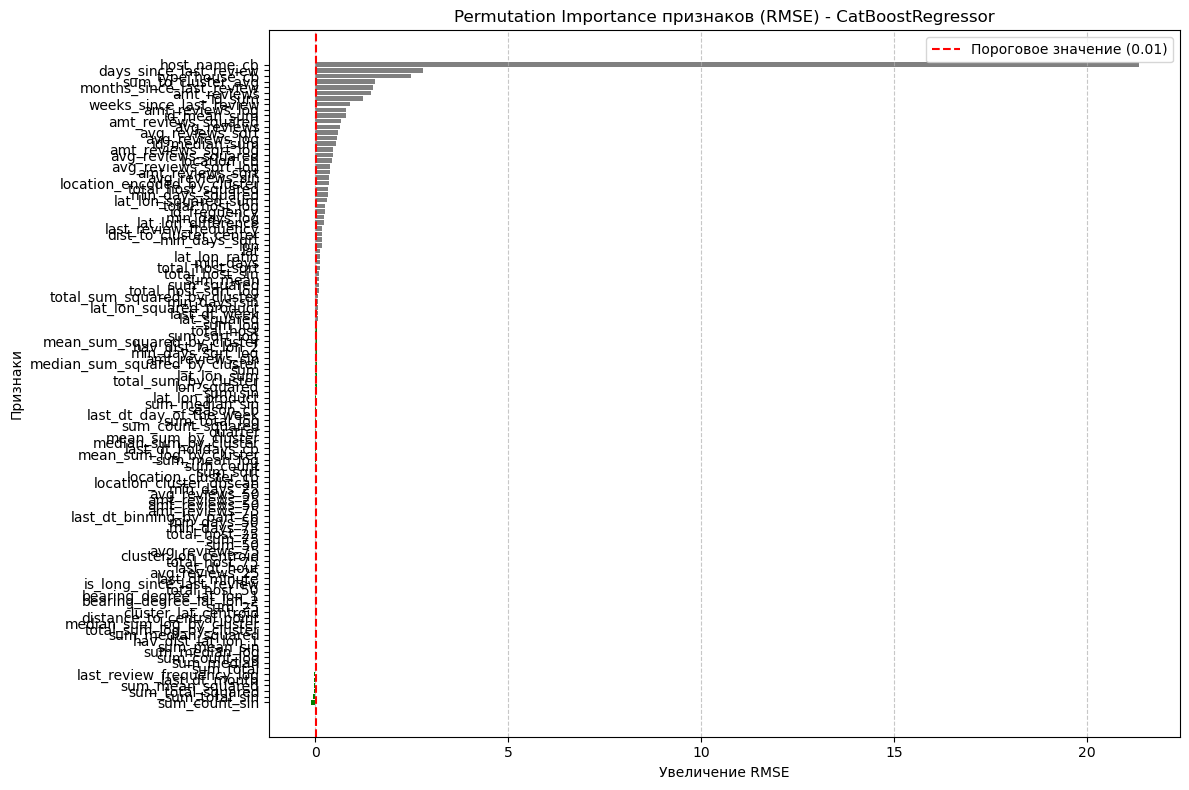

График важности признаков отображен.


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

def permutation_importance(X, y, n_repeats=10, threshold=0.01, metric='rmse', 
                           n_top_features=None, plot=True, cat_features=None):
    """
    Реализация алгоритма важности на основе перестановок (permutation importance) для задачи регрессии
    с использованием CatBoostRegressor.

    Алгоритм оценивает важность признака путем перемешивания его значений и измерения ухудшения качества модели
    по метрике RMSE (Root Mean Squared Error).

    Параметры:
    ----------
    X : pandas DataFrame
        Датафрейм с признаками
    y : pandas Series или numpy array
        Целевая переменная (для регрессии)
    n_repeats : int, по умолчанию 10
        Количество повторений перемешивания для каждого признака
    threshold : float, по умолчанию 0.01
        Пороговое значение важности для отбора признаков (в единицах RMSE)
    metric : str, по умолчанию 'rmse'
        Метрика для оценки качества модели (поддерживается только 'rmse')
    n_top_features : int или None, по умолчанию None
        Количество лучших признаков для отбора. Если указано, threshold игнорируется
    plot : bool, по умолчанию True
        Создавать ли график важности признаков
    cat_features : list или None, по умолчанию None
        Список категориальных признаков, если таковые имеются.

    Возвращает:
    -----------
    pandas DataFrame
        Датафрейм с важностью признаков и обоснованием выбора
    list
        Список выбранных признаков
    """
    # Проверка корректности параметров
    if metric != 'rmse':
        raise ValueError("Для задачи регрессии поддерживается только метрика 'rmse'.")

    # Создаем копию данных
    X_copy = X.copy()

    # Разделяем данные на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.3, random_state=42)

    # Создаем модель регрессии CatBoost
    model = CatBoostRegressor(
        iterations=500,
        learning_rate=0.1,
        depth=6,
        loss_function='RMSE',
        verbose=False,
        random_state=42
    )
    
    # Если заданы категориальные признаки, передаём их в fit
    if cat_features is not None:
        model.fit(X_train, y_train, cat_features=cat_features)
    else:
        model.fit(X_train, y_train)

    # Предсказания на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисляем базовую метрику RMSE
    baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Базовый RMSE модели: {baseline_rmse:.4f}")

    # Словари для хранения важности признаков и permuted RMSE
    feature_importance = {}
    feature_scores = {}

    # Для каждого признака
    for feature in X_test.columns:
        importance_scores = []
        permuted_scores = []

        # Повторяем n_repeats раз для стабильности оценки
        for _ in range(n_repeats):
            # Создаем копию тестовых данных
            X_test_permuted = X_test.copy()

            # Перемешиваем значения текущего признака
            X_test_permuted[feature] = np.random.permutation(X_test_permuted[feature].values)

            # Предсказания с перемешанным признаком
            y_pred_permuted = model.predict(X_test_permuted)

            # Вычисляем RMSE после перемешивания
            permuted_rmse = np.sqrt(mean_squared_error(y_test, y_pred_permuted))
            permuted_scores.append(permuted_rmse)

            # Важность признака — насколько выросла ошибка RMSE
            importance = permuted_rmse - baseline_rmse
            importance_scores.append(importance)

        # Средняя важность по повторениям
        feature_importance[feature] = np.mean(importance_scores)
        feature_scores[feature] = np.mean(permuted_scores)

    # Создаем DataFrame с результатами
    importance_df = pd.DataFrame({
        'feature': list(feature_importance.keys()),
        'importance': list(feature_importance.values()),
        'permuted_rmse': list(feature_scores.values())
    }).sort_values('importance', ascending=False)

    # Добавляем процентное увеличение RMSE по сравнению с базовым значением
    importance_df['percent_increase'] = (importance_df['importance'] / baseline_rmse) * 100

    # Добавляем обоснование выбора
    def get_justification(row):
        if row['importance'] <= 0:
            return "Признак не влияет на качество модели или его перемешивание улучшает модель"
        elif row['percent_increase'] < 1:
            return "Незначительное влияние на модель (менее 1% увеличения RMSE)"
        elif row['percent_increase'] < 5:
            return "Умеренное влияние на модель (1-5% увеличения RMSE)"
        elif row['percent_increase'] < 10:
            return "Существенное влияние на модель (5-10% увеличения RMSE)"
        else:
            return "Критически важный признак (более 10% увеличения RMSE)"

    importance_df['justification'] = importance_df.apply(get_justification, axis=1)

    # Определяем, какие признаки выбрать
    if n_top_features is not None:
        selected_features = importance_df.head(n_top_features)['feature'].tolist()
        importance_df['selected'] = importance_df['feature'].isin(selected_features)
    else:
        selected_features = importance_df[importance_df['importance'] > threshold]['feature'].tolist()
        importance_df['selected'] = importance_df['importance'] > threshold

    # Вывод результатов
    print("\nВажность признаков (permutation importance):")
    print(importance_df)

    print(f"\nВыбрано {len(selected_features)} признаков:")
    for feature in selected_features:
        row = importance_df[importance_df['feature'] == feature].iloc[0]
        print(f"- {feature}: важность = {row['importance']:.4f}, "
              f"увеличение RMSE = {row['percent_increase']:.2f}%, "
              f"обоснование: {row['justification']}")

    # Визуализация результатов - добавил такое еще
    if plot and not importance_df.empty:
        plt.figure(figsize=(12, 8))
        colors = ['green' if selected else 'gray' for selected in importance_df['selected']]
        sorted_df = importance_df.sort_values('importance')
        plt.barh(sorted_df['feature'], sorted_df['importance'], color=colors)
        if n_top_features is None:
            plt.axvline(x=threshold, color='red', linestyle='--',
                        label=f'Пороговое значение ({threshold})')
            plt.legend()
        plt.xlabel('Увеличение RMSE')
        plt.ylabel('Признаки')
        plt.title('Permutation Importance признаков (RMSE) - CatBoostRegressor')
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        print("График важности признаков отображен.")

    return importance_df, selected_features

X_true = train[model_features]  
y_true = train['target'] 

importance_df, selected_features = permutation_importance(
    X_true, y_true, n_repeats=10, threshold=0.01, metric='rmse', cat_features=None
)

In [59]:
# почитать в Excel

importance_df.to_excel("importance_features.xlsx", index=False)

### Исключим только те признаки, которые оказывают негативные влияние на метрику

#### Несколько раз прогонял тест, немного разные результаты - в итоге сделаю следующее - исключу фичи, которые permutation importance счет как влияющие негативно, так и с отсутствием влияния на скоры

In [62]:
numeric_features = [
    "days_since_last_review",
    "months_since_last_review",
    "amt_reviews",
    "id_sum",
    "sum_to_cluster_avg",
    "avg_reviews_sqrt_log",
    "id_mean_sum",
    "weeks_since_last_review",
    "avg_reviews_log",
    "amt_reviews_log",
    "avg_reviews",
    "id_median_sum",
    "amt_reviews_sqrt_log",
    "amt_reviews_sqrt",
    "amt_reviews_squared",
    "avg_reviews_sin",
    "avg_reviews_sqrt",
    "avg_reviews_squared",
    "total_host_squared",
    "min_days_squared",
    "location_encoded_by_cluster",
    "total_host_log",
    "total_host_sqrt",
    "id_frequency",
    "sum_squared",
    "min_days_log",
    "min_days",
    "total_sum_log_by_cluster",
    "min_days_sqrt",
    "dist_to_cluster_center",
    "total_host_sin",
    "last_review_frequency",
    "lon_squared",
    "sum_sqrt_log",
    "lat_lon_sum",
    "lat_lon_ratio",
    "lat_lon_difference",
    "lat",
    "hav_dist_lat_lon_2",
    "sum_sqrt",
    "min_days_sqrt_log",
    "total_host",
    "lat_squared",
    "last_dt_week",
    "lat_lon_squared_sum",
    "lon",
    "sum_mean",
    "sum_count",
    "sum_sin",
    "sum",
    "mean_sum_squared_by_cluster",
    "median_sum_squared_by_cluster",
    "total_host_sqrt_log",
    "hav_dist_lat_lon_1",
    "sum_total_squared",
    "median_sum_log_by_cluster",
    "amt_reviews_sin",
    "quarter",
    "mean_sum_by_cluster",
    "total_sum_squared_by_cluster",
    "lat_lon_squared_product",
    "lat_lon_product"
]

cat_features = [
    "host_name_cb",
    "type_house_cb",
    "location_cb",
    "location_cluster_cb"
]

model_features = numeric_features + cat_features

In [63]:
test[model_features]

,days_since_last_review,months_since_last_review,amt_reviews,id_sum,sum_to_cluster_avg,avg_reviews_sqrt_log,id_mean_sum,weeks_since_last_review,avg_reviews_log,amt_reviews_log,...,amt_reviews_sin,quarter,mean_sum_by_cluster,total_sum_squared_by_cluster,lat_lon_squared_product,lat_lon_product,host_name_cb,type_house_cb,location_cb,location_cluster_cb
0,2146.0,71.0,0,1691,3.214828,0.611186,338.200000,306.0,0.536493,0.000000,...,0.000000,4,113.978541,7.052742e+08,9.054676e+06,-3009.098891,82.555697,110.812253,110.306275,105.275460
1,2126.0,70.0,4,124,0.346460,0.881374,41.333333,303.0,1.098612,1.609438,...,-0.756802,2,107.129797,6.171945e+10,9.043676e+06,-3007.270597,162.333672,116.669400,121.888650,105.275460
2,2757.0,91.0,2,18236,1.364925,0.249078,256.845070,393.0,0.076961,1.098612,...,0.909297,3,183.238258,4.604114e+10,9.097877e+06,-3016.268787,242.178334,110.812253,140.794086,109.443669
3,2146.0,71.0,0,78,0.322288,0.611186,39.000000,306.0,0.536493,0.000000,...,0.000000,4,139.749790,1.111842e+11,9.056710e+06,-3009.436829,91.749040,116.669400,78.481218,105.275460
4,2316.0,77.0,1,55,0.443147,0.317847,55.000000,330.0,0.131028,0.693147,...,0.841471,4,113.533543,1.173127e+10,9.047824e+06,-3007.960028,190.958545,116.669400,100.431066,105.275460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12219,2111.0,70.0,74,102,0.610232,1.039417,51.000000,301.0,1.467874,4.317488,...,-0.985146,2,58.666667,3.097600e+04,9.055714e+06,-3009.271294,87.238337,116.669400,72.667090,201.791850
12220,2157.0,71.0,2,125,1.007151,0.577189,125.000000,308.0,0.476234,1.098612,...,0.909297,2,87.756173,8.084355e+08,9.030337e+06,-3005.051963,114.668359,110.812253,178.122056,105.275460
12221,3529.0,117.0,2,7440,0.744505,0.159739,190.769231,504.0,0.029559,1.098612,...,0.909297,3,213.054726,1.833895e+09,9.082092e+06,-3013.650863,253.322279,110.812253,105.646873,109.443669
12222,3469.0,115.0,2,364,0.491373,0.182322,182.000000,495.0,0.039221,1.098612,...,0.909297,4,185.236111,1.778756e+08,9.078702e+06,-3013.088410,59.212585,116.669400,111.762580,109.443669


In [64]:
### проверю проблему пропусков, в моменте было необходимо

In [65]:
train_numeric = train.select_dtypes(include=[np.number])
test_numeric = test.select_dtypes(include=[np.number])

# Проверка на бесконечность
train_inf = np.isinf(train_numeric).sum()
test_inf = np.isinf(test_numeric).sum()

print("Бесконечность в train:\n", train_inf[train_inf > 0])
print("\nБесконечность в test:\n", test_inf[test_inf > 0])

# На пропуски
train_missing = train.isnull().sum()
test_missing = test.isnull().sum()

print("Пропуски в train:\n", train_missing[train_missing > 0])
print("\nПропуски в test:\n", test_missing[test_missing > 0])

Бесконечность в train:
 Series([], dtype: Int64)

Бесконечность в test:
 Series([], dtype: Int64)
Пропуски в train:
 Series([], dtype: int64)

Пропуски в test:
 Series([], dtype: int64)


In [66]:
# заполнение пропусков ближайшими значениями (forward fill и backward fill)
train['last_dt'] = train['last_dt'].fillna(method='ffill').fillna(method='bfill')
test['last_dt'] = test['last_dt'].fillna(method='ffill').fillna(method='bfill')

### Тестовый CatBoost

In [68]:
# from catboost import CatBoostRegressor
# from sklearn.model_selection import train_test_split

# # Определяем признаки и целевую переменную
# X = train[model_features]
# y = train['target']

# # Разделяем данные на train и validation
# X_train, X_test, y_train, y_test = train_test_split(
#     X,  # Используем X, чтобы разделить только признаки
#     y,  # Целевая переменная
#     test_size=0.2,
#     stratify=train['target'],
#     random_state=42
# )

# # Обучение CatBoost модели
# model_catboost = CatBoostRegressor(
#     iterations=5000,
#     learning_rate=0.01,
#     depth=10,
#     loss_function='RMSE',
#     eval_metric='RMSE',
#     # cat_features=cat_features,
#     verbose=100
# )

# # Обучение модели
# model_catboost.fit(X_train, y_train, 
#                    eval_set=(X_test, y_test), 
#                    early_stopping_rounds=50)

# # Предсказание для тестовых данных
# y_pred = model_catboost.predict(X_test)

# # Выводим важность признаков
# feature_importance = model_catboost.get_feature_importance(prettified=True)
# print(feature_importance)

# # Получаем информацию о метрике с валидационного набора
# best_score = model_catboost.get_best_score()

# # Посмотрим, как выглядит структура best_score
# print(best_score)

# # RMSE
# rmse = best_score['validation']['RMSE']
# mse = rmse ** 2
# print(f"MSE на валидации: {mse}")

In [69]:
# # Создаем DataFrame с предсказаниями
# model_preds = model_catboost.predict(test[model_features])

# predictions_catboost_df = pd.DataFrame({
#     'index': test.index,
#     'prediction': model_preds
# })

# # Сохраняем в CSV
# predictions_catboost_df.to_excel('predictions.xlsx', index=False)

# predictions_catboost_df

### Кросс-валидация с 10 фолдами - Kfold CV CatBoost

#### Тут уже поинтереснее

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

X = train[model_features]
y = train['target']

# Количество фолдов
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Список для хранения ошибок
rmse_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
    print(f"\n===== Fold {fold+1} =====")

    # Разбиваем данные
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Создаем и обучаем модель
    model = CatBoostRegressor(
        iterations=5000,
        learning_rate=0.01,
        depth=10,
        loss_function='RMSE',
        eval_metric='RMSE',
        verbose=100,
        l2_leaf_reg=4,
        random_state=42
    )
    
    model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)

    # Оцениваем модель
    best_score = model.get_best_score()
    rmse = best_score['validation']['RMSE']
    rmse_scores.append(rmse)

# Средний RMSE по фолдам
print(f"\nСредний RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")

In [73]:
# # Создаем DataFrame с предсказаниями
# model_preds = best_model_hyperopt.predict(test[model_features])

# predictions_catboost_df = pd.DataFrame({
#     'index': test.index,
#     'prediction': model_preds
# })

# # Сохраняем в CSV
# predictions_catboost_df.to_excel('predictions.xlsx', index=False)

# predictions_catboost_df

# Практическое задание
## ML - Домашнее задание 3  
### Реализация ансамблевых методов с оценкой неопределенности  

**Дедлайн:** 23:59, 4 апреля  

## Вам необходимо:  
Реализовать стекинг для задачи регрессии из соревнования №2, а также оценить неопределенность предсказаний с помощью ансамблей моделей.  

### Базовые модели:  
- Обучите 5 различных моделей, например Random Forest, XGBoost, LightGBM, CatBoost и линейную регрессию (можно использовать другие).  
- Используйте Stratified K-Fold (K=5) для кросс-валидации при обучении каждой модели.  

### Реализация стекинга:  
1. Используйте Stratified K-Fold для получения out-of-fold предсказаний базовых моделей.  
2. Обучите мета-модель на этих предсказаниях.  
3. Получите финальные предсказания на тестовой выборке.  

### Оценка неопределенности:  
- Рассчитайте меру неопределенности предсказаний:  
  - Алеаторную  
  - Эпистемическую  
  - Их сумму  

### Анализ и визуализация:  
- Оцените производительность отдельных моделей и итогового стекинга по метрикам MSE.  
- Визуализируйте зависимость между неопределенностью предсказаний и фактической ошибкой.  

## Формат сдачи:  
- Jupyter Notebook с подробными комментариями и объяснениями.  
- Визуализации результатов (графики, таблицы).  
- Выводы по каждому этапу анализа.  

## Критерии оценки:  
- Корректность реализации стекинга.  
- Качество оценки неопределенности и ее интерпретация.  
- Глубина анализа результатов и качество визуализаций.  
- Чистота и читаемость кода.  

### Оценивание:  
- **8 баллов** – стекинг и оценка неопределенности без критических ошибок.  
- **Зачет на 4:** 7-8 баллов.  
- **Зачет на 5:** 9-10 баллов.  

**ВАЖНО!** Ссылки должны быть рабочие и с открытым доступом для скачивания.  

_Желаем удачи!_


In [75]:
solution_df = pd.read_csv("solution.csv")

In [76]:
solution_df

,index,prediction,Usage
0,0,359,Public
1,1,343,Public
2,2,365,Public
3,3,34,Public
4,4,15,Private
...,...,...,...
12219,12219,78,Private
12220,12220,170,Private
12221,12221,331,Public
12222,12222,0,Public


In [77]:
solution_private_df = solution_df.query('Usage == "Private"')
solution_public_df = solution_df.query('Usage == "Public"')

In [89]:
# total_mse = (1 / len(solution_df)) * np.sum((solution_df['prediction'] - predictions_catboost_df['prediction'])**2)
# print(f"Общая среднеквадратичная (MSE) ошибка для BaseLine CatBoost равна:\n{total_mse}")

NameError: name 'predictions_catboost_df' is not defined

## Стекинг

In [134]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.base import clone
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

### Базовые модели:  
- Обучите 5 различных моделей, например Random Forest, XGBoost, LightGBM, CatBoost и линейную регрессию (можно использовать другие).  
- Используйте Stratified K-Fold (K=5) для кросс-валидации при обучении каждой модели.  

In [93]:
model_1 = LinearRegression()
model_2 = LGBMRegressor(random_state=1)
model_3 = RandomForestRegressor(random_state=1)
model_4 = XGBRegressor(random_state=1)
model_5 = CatBoostRegressor(random_state=1)

In [95]:
train_model_features = train[model_features]
test_model_features = test[model_features]

In [148]:
# Базовые модели
base_models = [
    LinearRegression(),
    LGBMRegressor(random_state=1),
    RandomForestRegressor(random_state=1),
    XGBRegressor(random_state=1),
    CatBoostRegressor(verbose=0, random_state=1)
]

model_names = [
    "LinearRegression",
    "LGBM",
    "RandomForest",
    "XGBoost",
    "CatBoost"
]

meta_model = LinearRegression()  # "Use Linear Regression if base models show minimal 
                                # correlation or complement each other, as it efficiently combines their predictions..."

# Данные
X = train[model_features]
y = train['target']
X_test = test[model_features]

# Немного не понимаю, почему именно нужно использовать stratified для регрессии? Почему нельзя просто обычным KFold?

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Out-of-fold предсказания для обучения мета-модели
oof_predictions = np.zeros((X.shape[0], len(base_models)))
test_predictions = np.zeros((X_test.shape[0], len(base_models)))

for i, model in enumerate(base_models):
    print(f"\nОбучение модели: {model_names[i]}")
    fold_oof = np.zeros(X.shape[0])
    fold_test = np.zeros((X_test.shape[0], n_splits))

    for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model_ = clone(model)
        model_.fit(X_train, y_train)

        fold_oof[val_idx] = model_.predict(X_val)
        fold_test[:, fold] = model_.predict(X_test)

    oof_predictions[:, i] = fold_oof
    test_predictions[:, i] = fold_test.mean(axis=1)

# Обучаем мета-модель
meta_model.fit(oof_predictions, y)
final_predictions = meta_model.predict(test_predictions)

# добавим предсказания к признакам
X_meta_extended = np.hstack([X.values, oof_predictions])
X_test_extended = np.hstack([X_test.values, test_predictions])

# Можно обучить финальную мета-модель на этом
meta_model_2 = LinearRegression()
meta_model_2.fit(X_meta_extended, y)
final_predictions_extended = meta_model_2.predict(X_test_extended)


Обучение модели: LinearRegression

Обучение модели: LGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003494 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12263
[LightGBM] [Info] Number of data points in the train set: 23321, number of used features: 66
[LightGBM] [Info] Start training from score 114.537841
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003640 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12249
[LightGBM] [Info] Number of data points in the train set: 23321, number of used features: 66
[LightGBM] [Info] Start training from score 115.002616
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12307
[LightGBM] [Info] Number of data points in the train se

In [155]:
total_mse = (1 / len(solution_df)) * np.sum((solution_df['prediction'] - final_predictions_extended)**2)
print(f"Общая среднеквадратичная (MSE) ошибка для стекинга равна:\n{total_mse}")

Общая среднеквадратичная (MSE) ошибка для стекинга равна:
10773.738095365336


In [179]:
base_models = [
    LinearRegression(),
    LGBMRegressor(random_state=1),
    RandomForestRegressor(random_state=1),
    XGBRegressor(random_state=1),
    CatBoostRegressor(verbose=0, random_state=1)
]

model_names = [
    "LinearRegression",
    "LGBM",
    "RandomForest",
    "XGBoost",
    "CatBoost"
]

# Теперь используем CatBoost
meta_model = CatBoostRegressor(verbose=0, random_state=1)  

# Данные
X = train[model_features]
y = train['target']
X_test = test[model_features]

# ???
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Out-of-fold предсказания для обучения мета-модели
oof_predictions = np.zeros((X.shape[0], len(base_models)))
test_predictions = np.zeros((X_test.shape[0], len(base_models)))

for i, model in enumerate(base_models):
    print(f"\nОбучение модели: {model_names[i]}")
    fold_oof = np.zeros(X.shape[0])
    fold_test = np.zeros((X_test.shape[0], n_splits))

    for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model_ = clone(model)
        model_.fit(X_train, y_train)

        fold_oof[val_idx] = model_.predict(X_val)
        fold_test[:, fold] = model_.predict(X_test)

    oof_predictions[:, i] = fold_oof
    test_predictions[:, i] = fold_test.mean(axis=1)

# Обучаем мета-модель (CatBoost)
meta_model.fit(oof_predictions, y)
final_predictions = meta_model.predict(test_predictions)

# Добавляем предсказания к признакам
X_meta_extended = np.hstack([X.values, oof_predictions])
X_test_extended = np.hstack([X_test.values, test_predictions])

# Можно обучить финальную мета-модель на этом
meta_model_2 = CatBoostRegressor(verbose=0, random_state=1)
meta_model_2.fit(X_meta_extended, y)
final_predictions_extended = meta_model_2.predict(X_test_extended)


Обучение модели: LinearRegression

Обучение модели: LGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003930 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12263
[LightGBM] [Info] Number of data points in the train set: 23321, number of used features: 66
[LightGBM] [Info] Start training from score 114.537841
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003435 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12249
[LightGBM] [Info] Number of data points in the train set: 23321, number of used features: 66
[LightGBM] [Info] Start training from score 115.002616
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12307
[LightGBM] [Info] Number of data points in the train se

In [214]:
total_mse = (1 / len(solution_df)) * np.sum((solution_df['prediction'] - final_predictions_extended)**2)
print(f"Общая среднеквадратичная (MSE) ошибка для стекинга с CatBoost равна:\n{total_mse}")

Общая среднеквадратичная (MSE) ошибка для стекинга с CatBoost равна:
10750.604580021327


### Оценка неопределенности:  
- Рассчитайте меру неопределенности предсказаний:  
  - Алеаторную  
  - Эпистемическую  
  - Их сумму

In [216]:
def calc_aleatoric(y_true, y_pred):
    residuals = y_true - y_pred
    return np.mean(residuals**2)

def calc_epistemic(preds):
    mean_pred = np.mean(preds, axis=0)
    return np.mean(np.sum((preds - mean_pred)**2, axis=0) / preds.shape[0])

# Предсказания по всем моделям (по строкам) и true значения
y_true = solution_df['prediction'].values
preds = final_predictions_extended.T

# Считаем неопределённости
aleatoric = np.mean([calc_aleatoric(y_true, p) for p in preds])
epistemic = calc_epistemic(preds)
total = aleatoric + epistemic

#### Алеаторная

In [218]:
print("Aleatoric uncertainty:", aleatoric)

Aleatoric uncertainty: 25027.44590576777


#### Эпистемическую

In [220]:
print("Epistemic uncertainty:", epistemic)


Epistemic uncertainty: 7667.137345128904


#### Сумма Алеаторной и Эпистемической неопределенностей

In [222]:
print("Total uncertainty:", total)

Total uncertainty: 32694.583250896674


#### Снова модели

In [228]:
X = train[model_features]
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,
    stratify=train['target'],
    random_state=42
)

# Обучение CatBoost модели
model_catboost = CatBoostRegressor(
    iterations=5000,
    learning_rate=0.01,
    depth=10,
    loss_function='RMSE',
    eval_metric='RMSE',
    # cat_features=cat_features,
    verbose=200
)

model_catboost.fit(X_train, y_train, 
                   eval_set=(X_test, y_test), 
                   early_stopping_rounds=50)

y_pred = model_catboost.predict(X_test)

best_score = model_catboost.get_best_score()
rmse = best_score['validation']['RMSE']
mse = rmse ** 2
print(f"MSE на валидации: {mse}")

0:	learn: 128.9512754	test: 128.9284757	best: 128.9284757 (0)	total: 59.9ms	remaining: 4m 59s
200:	learn: 95.3233924	test: 97.0011289	best: 97.0011289 (200)	total: 11.9s	remaining: 4m 43s
400:	learn: 90.4120917	test: 94.0752795	best: 94.0752795 (400)	total: 24.1s	remaining: 4m 35s
600:	learn: 87.7571595	test: 93.1503268	best: 93.1503268 (600)	total: 37s	remaining: 4m 30s
800:	learn: 85.5765138	test: 92.6789535	best: 92.6789535 (800)	total: 50.3s	remaining: 4m 23s
1000:	learn: 83.4869153	test: 92.3391528	best: 92.3391528 (1000)	total: 1m 3s	remaining: 4m 13s
1200:	learn: 81.4522969	test: 92.1321747	best: 92.1321747 (1200)	total: 1m 16s	remaining: 4m 3s
1400:	learn: 79.4455149	test: 92.0156951	best: 92.0138407 (1398)	total: 1m 29s	remaining: 3m 50s
1600:	learn: 77.4913107	test: 91.9149630	best: 91.9129173 (1599)	total: 1m 42s	remaining: 3m 37s
1800:	learn: 75.6870672	test: 91.8413282	best: 91.8413282 (1800)	total: 1m 54s	remaining: 3m 24s
2000:	learn: 74.0314370	test: 91.8123750	best: 91

In [240]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = train[model_features]
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(
    train[model_features],
    train['target'],
    test_size=0.2,
    random_state=42,
    stratify=train['target']
)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror', 
    'eval_metric': 'rmse',           
    'learning_rate': 0.05,
    'max_depth': 10,
    'silent': 1,
    'verbosity': 0
}

# Обучение модели XGBoost
watchlist = [(dtrain, 'train'), (dtest, 'eval')]
model_xgboost = xgb.train(params, dtrain, num_boost_round=1000, evals=watchlist, early_stopping_rounds=100)

evals_result = model_xgboost.eval(dtest)

rmse_str = evals_result.split('\t')[1]
rmse = float(rmse_str.split(':')[1])

mse_xgboost = rmse ** 2
print(f"MSE на валидации: {mse_xgboost}")

[0]	train-rmse:126.01985	eval-rmse:126.51448
[1]	train-rmse:122.82290	eval-rmse:123.89624
[2]	train-rmse:119.82969	eval-rmse:121.43509
[3]	train-rmse:117.00905	eval-rmse:119.18872
[4]	train-rmse:114.34054	eval-rmse:117.10609
[5]	train-rmse:111.85515	eval-rmse:115.21908
[6]	train-rmse:109.48783	eval-rmse:113.42522
[7]	train-rmse:107.25303	eval-rmse:111.81085
[8]	train-rmse:105.11453	eval-rmse:110.31066
[9]	train-rmse:103.08115	eval-rmse:108.91217
[10]	train-rmse:101.16390	eval-rmse:107.63868
[11]	train-rmse:99.35402	eval-rmse:106.43764
[12]	train-rmse:97.66336	eval-rmse:105.41012
[13]	train-rmse:96.07553	eval-rmse:104.45687
[14]	train-rmse:94.52032	eval-rmse:103.54358
[15]	train-rmse:93.11499	eval-rmse:102.73073
[16]	train-rmse:91.80838	eval-rmse:101.95693
[17]	train-rmse:90.48139	eval-rmse:101.24188
[18]	train-rmse:89.27289	eval-rmse:100.61611
[19]	train-rmse:88.10280	eval-rmse:100.03535
[20]	train-rmse:87.02810	eval-rmse:99.52219
[21]	train-rmse:85.98008	eval-rmse:99.06314
[22]	train-

In [242]:
X = train[model_features]
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,  
    test_size=0.2,
    stratify=train['target'],
    random_state=42
)

# Обучение модели LinearRegression
model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE на валидации: {mse}")

MSE на валидации: 9749.402275587445


In [244]:

X = train[model_features]
y = train['target']


X_train, X_test, y_train, y_test = train_test_split(
    X,  
    y, 
    test_size=0.2,
    stratify=train['target'],
    random_state=42
)

# Обучение модели RandomForestRegressor
model_rf = RandomForestRegressor(
    n_estimators=500,
    random_state=42
)

model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE на валидации: {mse}")


MSE на валидации: 8692.612371189847


In [246]:
X = train[model_features]
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,
    stratify=train['target'],
    random_state=42
)

# Обучение модели LGBMRegressor
model_lgbm = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.01,
    random_state=42
)

model_lgbm.fit(X_train, y_train)

y_pred = model_lgbm.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE на валидации: {mse}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003497 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12269
[LightGBM] [Info] Number of data points in the train set: 23321, number of used features: 66
[LightGBM] [Info] Start training from score 114.682475
MSE на валидации: 8692.510118663842


In [248]:
model_preds_catboost = model_catboost.predict(test[model_features])
model_preds_randomforest = model_rf.predict(test[model_features])

model_preds_xgboost = model_xgboost.predict(xgb.DMatrix(test[model_features]))

model_preds_lightgbm = model_lgbm .predict(test[model_features])
model_preds_linearregression = model_lr.predict(test[model_features])

### Анализ и визуализация:  
- Оцените производительность отдельных моделей и итогового стекинга по метрикам MSE.  
- Визуализируйте зависимость между неопределенностью предсказаний и фактической ошибкой.  

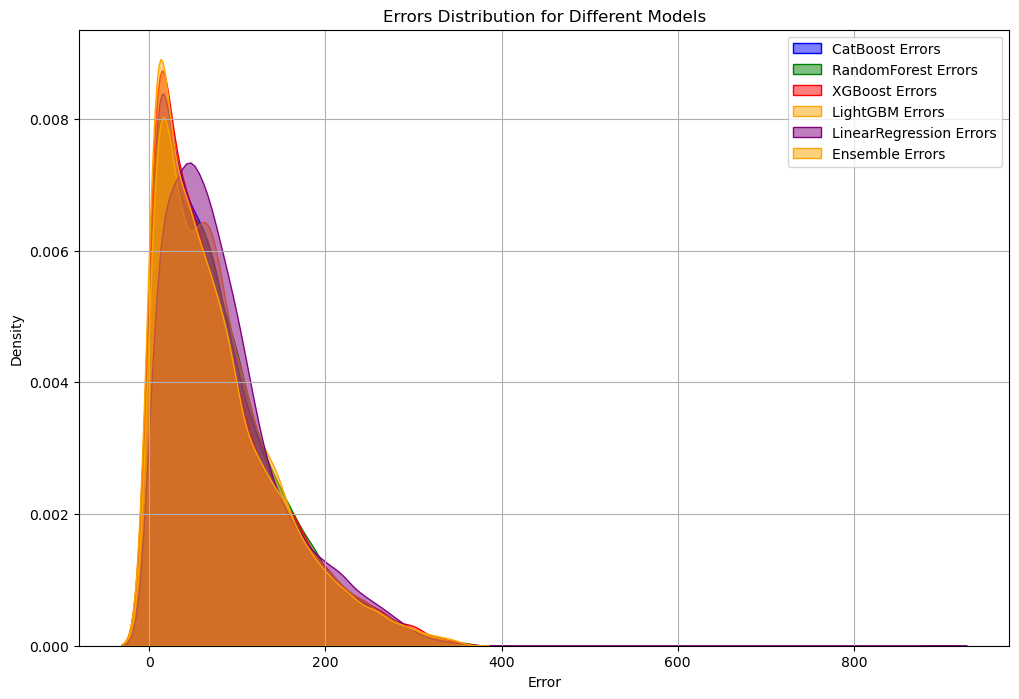

In [276]:
# Вычисление ошибок

errors_catboost = np.abs(solution_df['prediction'] - model_preds_catboost)
errors_randomforest = np.abs(solution_df['prediction'] - model_preds_randomforest)
errors_xgboost = np.abs(solution_df['prediction'] - model_preds_xgboost)
errors_lightgbm = np.abs(solution_df['prediction'] - model_preds_lightgbm)
errors_linearregression = np.abs(solution_df['prediction'] - model_preds_linearregression)
errors_ensemble = np.abs(solution_df['prediction'] - final_predictions_extended)

plt.figure(figsize=(12, 8))
sns.kdeplot(errors_catboost, label='CatBoost Errors', color='blue', fill=True, alpha=0.5)
sns.kdeplot(errors_randomforest, label='RandomForest Errors', color='green', fill=True, alpha=0.5)
sns.kdeplot(errors_xgboost, label='XGBoost Errors', color='red', fill=True, alpha=0.5)
sns.kdeplot(errors_lightgbm, label='LightGBM Errors', color='orange', fill=True, alpha=0.5)
sns.kdeplot(errors_linearregression, label='LinearRegression Errors', color='purple', fill=True, alpha=0.5)
sns.kdeplot(errors_ensemble, label='Ensemble Errors', color='orange', fill=True, alpha=0.5)

plt.title('Errors Distribution for Different Models')
plt.xlabel('Error')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

### Выводы следующие

1) Хочется отметить, что, на мой взгляд, есть ряд неточностей при проведении стекинга, - есть ряд вопросов по начальным инициализациям моделей и способам отпимизации итоговой композиции.
   - Можно подчеркнуть, что на итоговый результат работы композиции крайне значимое влияние оказывают базово инициализированные модели; так, SVR вносил существенное смещение в итоговую MSE модели.
2) Говоря же о неопределенности, то здесь стоит подсветить следующие моменты:
    - На текущий момент, решение получается достаточно неустойчивым;
    - **Алеаторная неопределенность**: связана с шумом в данных, который модель не может устранить.
    - Снова же, скорее всего, ошибка аналогична той, с которой я столкнулся при решении соревнования, - сгенерировано достаточное множество признаков данных, влияние на модель которых как таковое достаточно тяжело уловить; в различных иницициализациях валидации признаков можно получать разные результаты, а самое главное, сам дизайн разработки признаков стоит подвергнуть сомнению, так как есть большая вероятность того, что многие агрегированные значения по некоторым кластерам имеют временную структуру, что делает серьезный вклад в переобучение модели;
    - Подытоживая, именно борьба с шумом способна оказать наиболее значимое влияние на наши итоговые скоры.
    - **Эпистемическая неопределенность**: возникает из-за недостатка знаний или данных для обучения модели.
    - Тут скорее тенденция относительно положительная. Данных, признаков достаточно для обучения модели. Проблема, скорее, заключается в структуре заинжениринных признаков, а также в ряде прочих предпосылок, не выполненных при проведении исследования.
4) Переходя же к сравнению алгоритмов, по ряду причин, описанных выше, правильно настроенные деревья решений дают более интересный результат.